In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/smartphones_data.csv (2).csv')

In [ ]:
# Display first few rows
print(df.head())

  brand_name                      Name   Price   RAM       OS  storage  \
0       vivo                  vivo v50   34999   8.0  android    128.0   
1     realme             realme p3 pro   21999   8.0  android    128.0   
2     realme        realme 14 pro plus   27999   8.0  android    128.0   
3    samsung  samsung galaxy s25 ultra  129999  12.0  android    256.0   
4       vivo               vivo t3 pro   22999   8.0  android    128.0   

   Battery_cap has_fast_charging has_fingerprints has_nfc has_5g  \
0         6000               Yes              Yes      No    Yes   
1         6000               Yes              Yes      No    Yes   
2         6000               Yes              Yes      No    Yes   
3         5000               Yes              Yes     Yes    Yes   
4         5500               Yes              Yes      No    Yes   

  processor_brand  num_core  primery_rear_camera  Num_Rear_Cameras  \
0      snapdragon       8.0                 50.0                 2   
1     

In [ ]:
  # Basic dataset information
print(df.info())
print("\nMissing values:")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            3260 non-null   object 
 1   Name                  3260 non-null   object 
 2   Price                 3260 non-null   int64  
 3   RAM                   3260 non-null   float64
 4   OS                    3260 non-null   object 
 5   storage               3260 non-null   float64
 6   Battery_cap           3260 non-null   int64  
 7   has_fast_charging     3260 non-null   object 
 8   has_fingerprints      2534 non-null   object 
 9   has_nfc               2534 non-null   object 
 10  has_5g                2534 non-null   object 
 11  processor_brand       3260 non-null   object 
 12  num_core              3085 non-null   float64
 13  primery_rear_camera   3260 non-null   float64
 14  Num_Rear_Cameras      3260 non-null   int64  
 15  primery_front_camera 

In [ ]:
# Ensure columns exist and contain only numeric values
for col in ['has_fingerprints', 'has_nfc', 'has_5g']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric (handles non-numeric values)
        df[col] = df[col].fillna(0).astype(int)  # Fill NaN with 0 and convert to int


In [ ]:
# Basic statistics
print("\nBasic statistics:")
print(df.describe())



Basic statistics:
               Price          RAM      storage   Battery_cap  \
count    3260.000000  3260.000000  3260.000000   3260.000000   
mean    20181.384356     5.065874   112.040893   4163.485583   
std     24145.388368     3.256896   126.893532   1312.404904   
min      2500.000000     0.250000     0.310000   1100.000000   
25%      7490.000000     3.000000    32.000000   3007.500000   
50%     11999.000000     4.000000    64.000000   4500.000000   
75%     21999.000000     8.000000   128.000000   5000.000000   
max    200999.000000    24.000000  1024.000000  22000.000000   

       has_fingerprints  has_nfc  has_5g     num_core  primery_rear_camera  \
count            3260.0   3260.0  3260.0  3260.000000          3260.000000   
mean                0.0      0.0     0.0     7.138037            32.655828   
std                 0.0      0.0     0.0     1.649559            29.397695   
min                 0.0      0.0     0.0     1.000000             0.300000   
25%           

In [ ]:
# NumPy Operations
price_array = df['Price'].to_numpy()
print("\nMean Price:", np.mean(price_array))
print("Median Price:", np.median(price_array))
print("Standard Deviation:", np.std(price_array))



Mean Price: 20181.38435582822
Median Price: 11999.0
Standard Deviation: 24141.68480333083


In [ ]:
# Z-score Normalization for Price
price_mean = np.mean(df['Price'])
price_std = np.std(df['Price'])
df['Price_zscore'] = (df['Price'] - price_mean) / price_std
print("\nFirst 5 rows with Price Z-score:")
print(df[['Price', 'Price_zscore']].head())


First 5 rows with Price Z-score:
    Price  Price_zscore
0   34999      0.613777
1   21999      0.075290
2   27999      0.323822
3  129999      4.548880
4   22999      0.116712


In [ ]:
# Boolean Indexing: Mid-range Smartphones (Price between 200-500)
mid_range_smartphones = df[(df['Price'] >= 200) & (df['Price'] <= 500)]
print("\nNumber of mid-range smartphones:", len(mid_range_smartphones))


Number of mid-range smartphones: 0


In [ ]:
# Pandas Groupby operations
brand_avg_price = df.groupby('brand_name')['Price'].mean()
print("\nAverage price per brand:")
print(brand_avg_price)


Average price per brand:
brand_name
Other        12717.822300
apple        85701.591667
asus         28299.740260
coolpad       7271.227273
gionee        8849.027027
google       52165.500000
honor        17298.157895
htc          21315.483871
ikall         5904.690722
infinix      12382.370000
intex         5386.288136
iqoo         30167.776119
itel          6180.229508
karbonn       5101.756098
lava          8116.709402
lenovo       11338.474576
lg           19750.772727
lyf           4847.500000
micromax      7295.350000
moto         11245.388889
motorola     29700.914286
nokia        12428.541667
oneplus      37159.571429
oppo         20508.068966
panasonic     7401.000000
poco         14620.300000
realme       16156.370861
samsung      32697.488889
sony         22749.823529
tecno        13416.344538
vivo         22398.515021
xiaomi       15412.766393
xolo          8561.475000
Name: Price, dtype: float64


In [ ]:
# Pivot Table
pivot_table = pd.pivot_table(df, index='brand_name', values='Price', aggfunc='mean')
print("\nPivot Table (Brand vs Average Price):")
print(pivot_table)


Pivot Table (Brand vs Average Price):
                   Price
brand_name              
Other       12717.822300
apple       85701.591667
asus        28299.740260
coolpad      7271.227273
gionee       8849.027027
google      52165.500000
honor       17298.157895
htc         21315.483871
ikall        5904.690722
infinix     12382.370000
intex        5386.288136
iqoo        30167.776119
itel         6180.229508
karbonn      5101.756098
lava         8116.709402
lenovo      11338.474576
lg          19750.772727
lyf          4847.500000
micromax     7295.350000
moto        11245.388889
motorola    29700.914286
nokia       12428.541667
oneplus     37159.571429
oppo        20508.068966
panasonic    7401.000000
poco        14620.300000
realme      16156.370861
samsung     32697.488889
sony        22749.823529
tecno       13416.344538
vivo        22398.515021
xiaomi      15412.766393
xolo         8561.475000


In [ ]:
# Additional Pivot Table: Feature Availability
feature_pivot = pd.pivot_table(df, index='brand_name', values=['has_fingerprints', 'has_nfc', 'has_5g'], aggfunc='mean')
print("\nFeature Availability by Brand:")
print(feature_pivot)


Feature Availability by Brand:
            has_5g  has_fingerprints  has_nfc
brand_name                                   
Other          0.0               0.0      0.0
apple          0.0               0.0      0.0
asus           0.0               0.0      0.0
coolpad        0.0               0.0      0.0
gionee         0.0               0.0      0.0
google         0.0               0.0      0.0
honor          0.0               0.0      0.0
htc            0.0               0.0      0.0
ikall          0.0               0.0      0.0
infinix        0.0               0.0      0.0
intex          0.0               0.0      0.0
iqoo           0.0               0.0      0.0
itel           0.0               0.0      0.0
karbonn        0.0               0.0      0.0
lava           0.0               0.0      0.0
lenovo         0.0               0.0      0.0
lg             0.0               0.0      0.0
lyf            0.0               0.0      0.0
micromax       0.0               0.0      0.0
mo

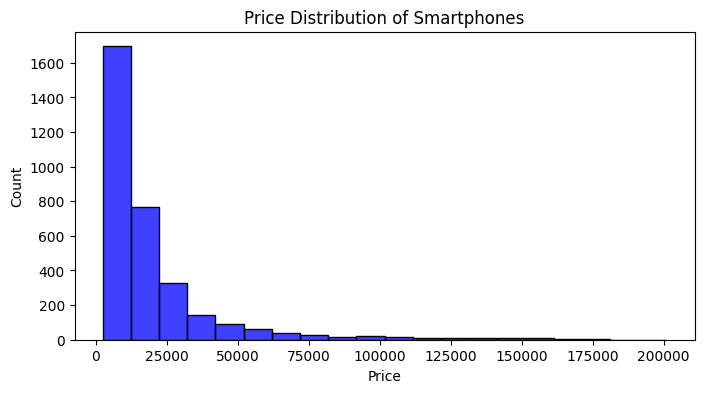

In [ ]:
# Visualizations
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=20, color='blue')
plt.title('Price Distribution of Smartphones')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

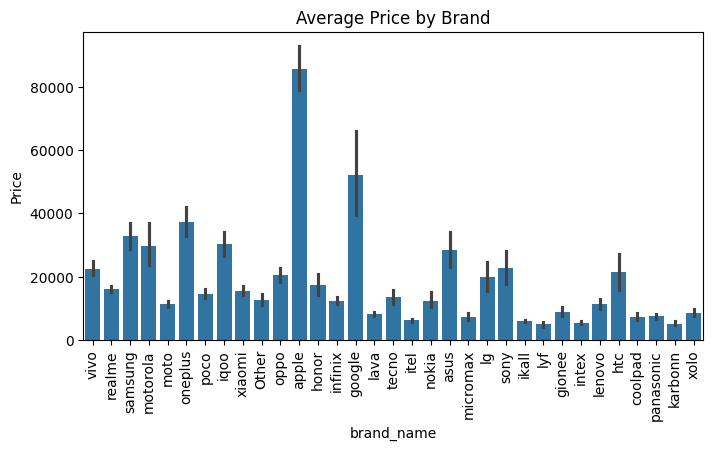

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='brand_name', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Average Price by Brand')
plt.show()

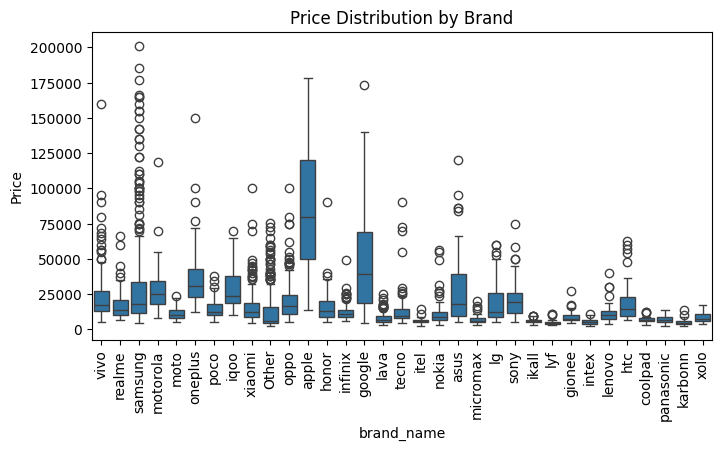

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='brand_name', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand')
plt.show()

In [3]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("/content/smartphones_data.csv (2) (1).csv")

# Quick check
print(df.head())


  brand_name                      Name   Price   RAM       OS  storage  \
0       vivo                  vivo v50   34999   8.0  android    128.0   
1     realme             realme p3 pro   21999   8.0  android    128.0   
2     realme        realme 14 pro plus   27999   8.0  android    128.0   
3    samsung  samsung galaxy s25 ultra  129999  12.0  android    256.0   
4       vivo               vivo t3 pro   22999   8.0  android    128.0   

   Battery_cap has_fast_charging has_fingerprints has_nfc has_5g  \
0         6000               Yes              Yes      No    Yes   
1         6000               Yes              Yes      No    Yes   
2         6000               Yes              Yes      No    Yes   
3         5000               Yes              Yes     Yes    Yes   
4         5500               Yes              Yes      No    Yes   

  processor_brand  num_core  primery_rear_camera  Num_Rear_Cameras  \
0      snapdragon       8.0                 50.0                 2   
1     

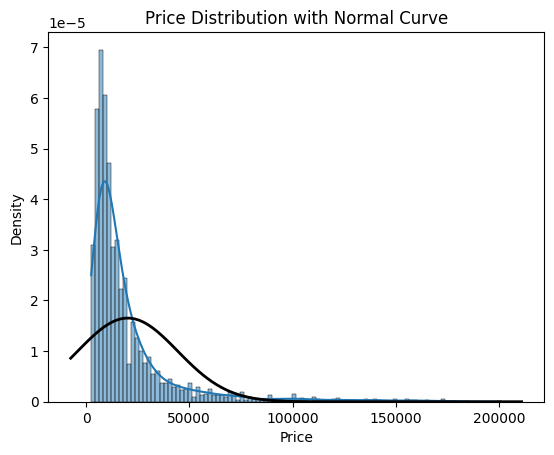

Statistics=0.612, p=0.000


In [4]:
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Distribution plot
sns.histplot(df['Price'], kde=True, stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df['Price'].mean(), df['Price'].std())
plt.plot(x, p, 'k', linewidth=2)
plt.title('Price Distribution with Normal Curve')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(df['Price'])
print(f'Statistics={stat:.3f}, p={p:.3f}')


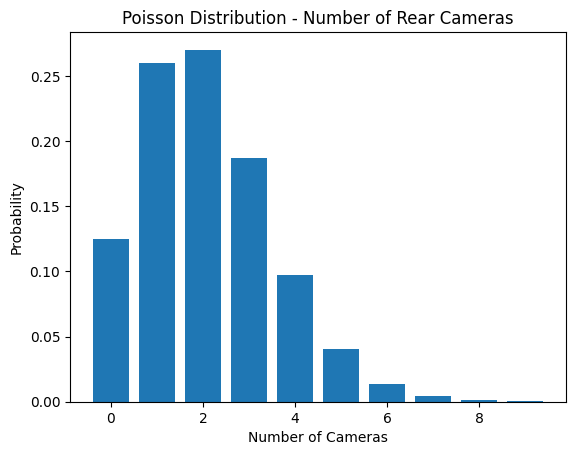

In [5]:
from scipy.stats import poisson

# Poisson Distribution - PMF plot
mean_rear_cameras = df['Num_Rear_Cameras'].mean()
x = np.arange(0, 10)
pmf = poisson.pmf(x, mean_rear_cameras)

plt.bar(x, pmf)
plt.title('Poisson Distribution - Number of Rear Cameras')
plt.xlabel('Number of Cameras')
plt.ylabel('Probability')
plt.show()


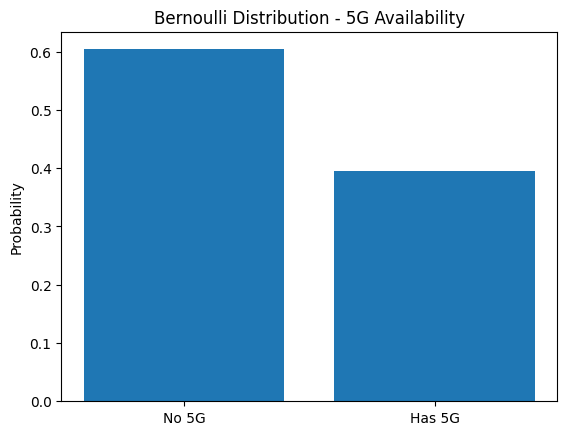

In [6]:
from scipy.stats import bernoulli

# Convert 'has_5g' to 1/0
df['has_5g_binary'] = df['has_5g'].map({'Yes': 1, 'No': 0})

# Bernoulli Distribution
p = df['has_5g_binary'].mean()
bernoulli_dist = bernoulli(p)

# PMF
x = [0, 1]
pmf = bernoulli_dist.pmf(x)

plt.bar(x, pmf)
plt.xticks([0, 1], ['No 5G', 'Has 5G'])
plt.title('Bernoulli Distribution - 5G Availability')
plt.ylabel('Probability')
plt.show()


In [7]:
from scipy.stats import zscore

# Z-score for Price
df['z_score_price'] = zscore(df['Price'])
print(df[['Price', 'z_score_price']].head())


    Price  z_score_price
0   34999       0.613777
1   21999       0.075290
2   27999       0.323822
3  129999       4.548880
4   22999       0.116712


In [8]:
from scipy.stats import ttest_1samp

# Hypothesis: Average Price > 25000 (one-tailed)
t_stat, p_value = ttest_1samp(df['Price'], 25000)
one_tailed_p = p_value / 2

print(f"t-statistic = {t_stat:.3f}, one-tailed p-value = {one_tailed_p:.5f}")

# Two-tailed: Is Price significantly different from 25000?
print(f"t-statistic = {t_stat:.3f}, two-tailed p-value = {p_value:.5f}")


t-statistic = -11.395, one-tailed p-value = 0.00000
t-statistic = -11.395, two-tailed p-value = 0.00000


In [9]:
# Simulate
alpha = 0.05  # Type-1 error probability
beta = 0.2    # Type-2 error probability

print(f"Probability of Type 1 error (False Positive) = {alpha}")
print(f"Probability of Type 2 error (False Negative) = {beta}")


Probability of Type 1 error (False Positive) = 0.05
Probability of Type 2 error (False Negative) = 0.2


In [10]:
import scipy.stats as stats
import numpy as np

# 95% Confidence Interval
mean = np.mean(df['Price'])
sem = stats.sem(df['Price'])  # Standard Error
conf_interval = stats.t.interval(0.95, len(df['Price'])-1, loc=mean, scale=sem)

print(f"95% confidence interval for average Price: {conf_interval}")


95% confidence interval for average Price: (np.float64(19352.23110384999), np.float64(21010.53760780645))


In [11]:
# Pearson Correlation
correlation = df['RAM'].corr(df['Price'])
print(f"Correlation between RAM and Price: {correlation:.3f}")


Correlation between RAM and Price: 0.539


In [12]:
from statsmodels.stats.weightstats import ztest

# Z-test (Large sample, known std deviation)
z_stat, p_val = ztest(df['Price'], value=25000)
print(f"Z-test statistic = {z_stat:.3f}, p-value = {p_val:.5f}")

# T-test (Small sample or unknown std deviation)
t_stat, p_val = ttest_1samp(df['Price'], 25000)
print(f"T-test statistic = {t_stat:.3f}, p-value = {p_val:.5f}")


Z-test statistic = -11.395, p-value = 0.00000
T-test statistic = -11.395, p-value = 0.00000


In [13]:
# Variance comparison between two brands
brand1 = df[df['brand_name'] == 'vivo']['Price']
brand2 = df[df['brand_name'] == 'realme']['Price']

f_stat = np.var(brand1, ddof=1) / np.var(brand2, ddof=1)
print(f"F-statistic (variance vivo/realme) = {f_stat:.3f}")


F-statistic (variance vivo/realme) = 4.147


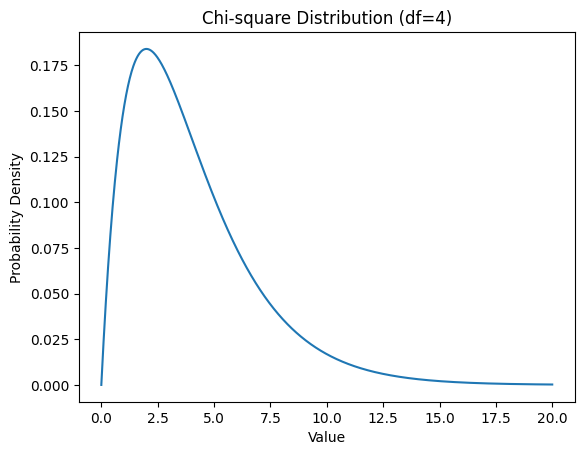

In [14]:
from scipy.stats import chi2

# Chi-square distribution
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df=4)

plt.plot(x, y)
plt.title('Chi-square Distribution (df=4)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


In [15]:
from scipy.stats import chi2_contingency

# Cross table
contingency = pd.crosstab(df['brand_name'], df['has_5g_binary'])

# Chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency)

print(f"Chi-square statistic = {chi2_stat:.3f}, p-value = {p_val:.5f}")


Chi-square statistic = 504.363, p-value = 0.00000


In [16]:
from scipy.stats import f_oneway

# Selecting three brands
vivo_prices = df[df['brand_name'] == 'vivo']['Price']
realme_prices = df[df['brand_name'] == 'realme']['Price']
samsung_prices = df[df['brand_name'] == 'samsung']['Price']

# One-Way ANOVA
anova_stat, p_val = f_oneway(vivo_prices, realme_prices, samsung_prices)
print(f"ANOVA F-statistic = {anova_stat:.3f}, p-value = {p_val:.5f}")


ANOVA F-statistic = 34.934, p-value = 0.00000


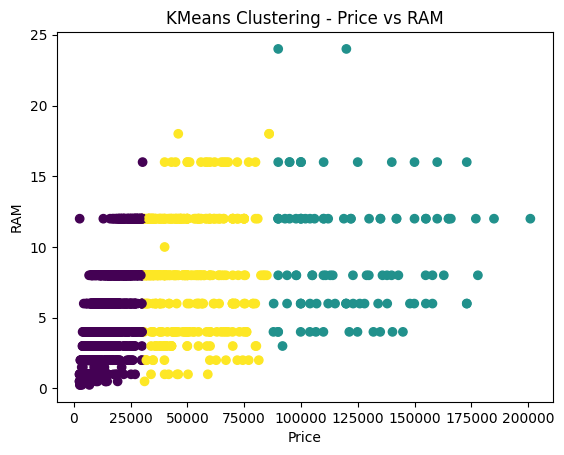

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features
X = df[['Price', 'RAM']].dropna()

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot
plt.scatter(df['Price'], df['RAM'], c=df['Cluster'], cmap='viridis')
plt.title('KMeans Clustering - Price vs RAM')
plt.xlabel('Price')
plt.ylabel('RAM')
plt.show()


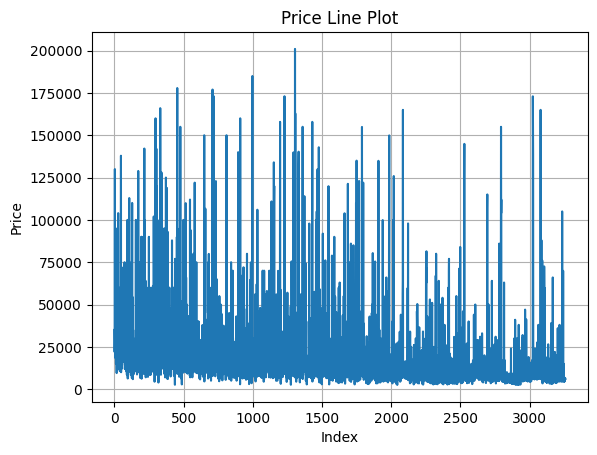

In [18]:
import matplotlib.pyplot as plt

# Line plot
plt.plot(df['Price'])
plt.title('Price Line Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.show()


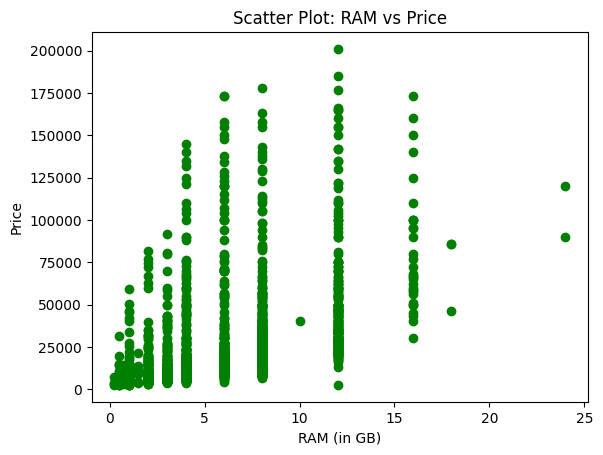

In [19]:
plt.scatter(df['RAM'], df['Price'], color='green')
plt.title('Scatter Plot: RAM vs Price')
plt.xlabel('RAM (in GB)')
plt.ylabel('Price')
plt.show()


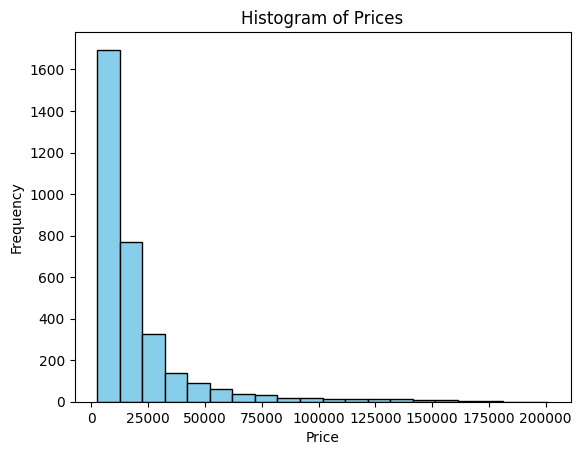

In [22]:
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


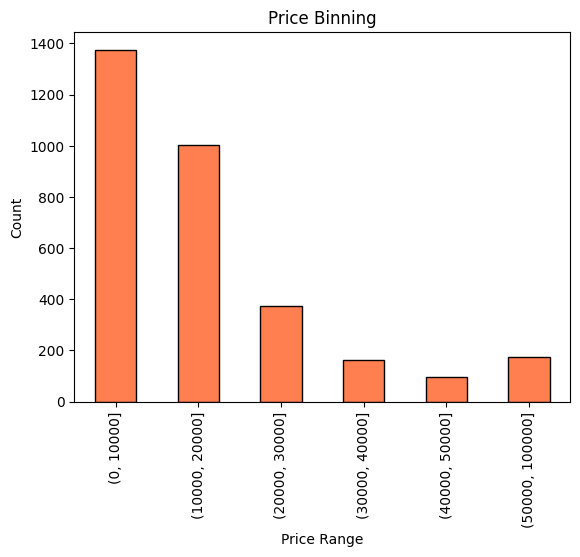

In [23]:
# Binning Price into ranges
bins = [0, 10000, 20000, 30000, 40000, 50000, 100000]
df['Price_bin'] = pd.cut(df['Price'], bins)

# Bar plot of counts
df['Price_bin'].value_counts(sort=False).plot(kind='bar', color='coral', edgecolor='black')
plt.title('Price Binning')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


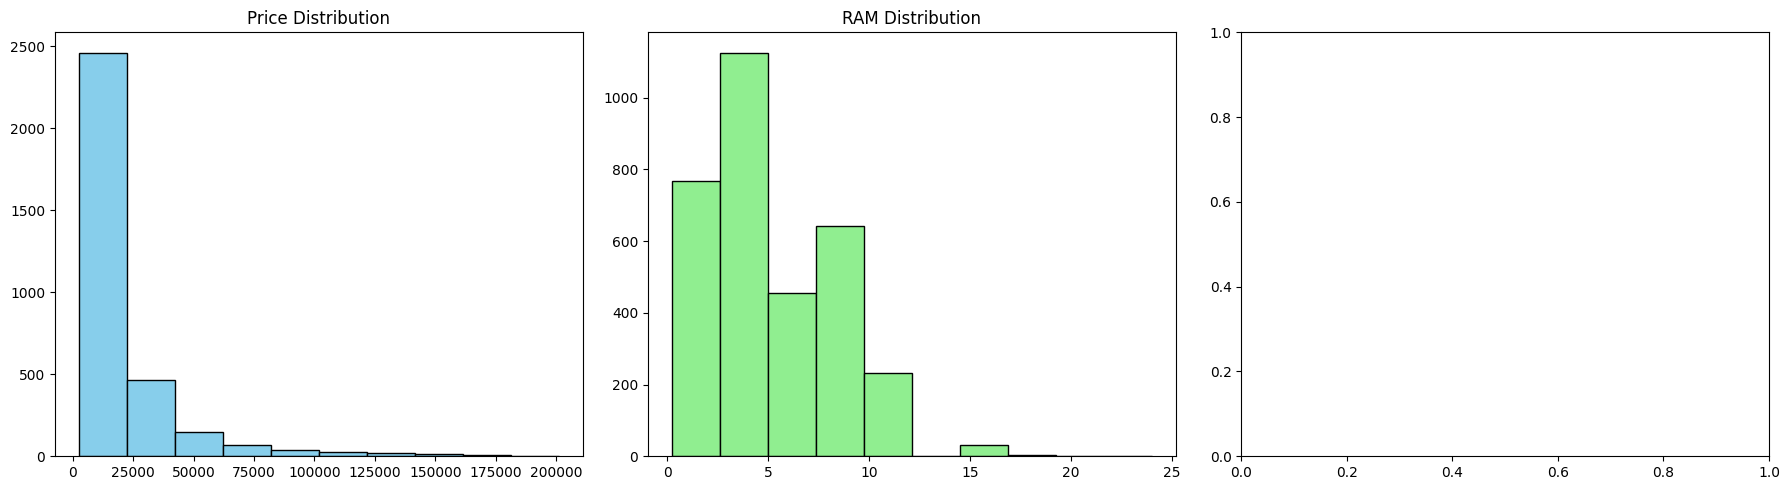

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Price
axs[0].hist(df['Price'], color='skyblue', edgecolor='black')
axs[0].set_title('Price Distribution')

# RAM
axs[1].hist(df['RAM'], color='lightgreen', edgecolor='black')
axs[1].set_title('RAM Distribution')

# Battery

plt.tight_layout()
plt.show()


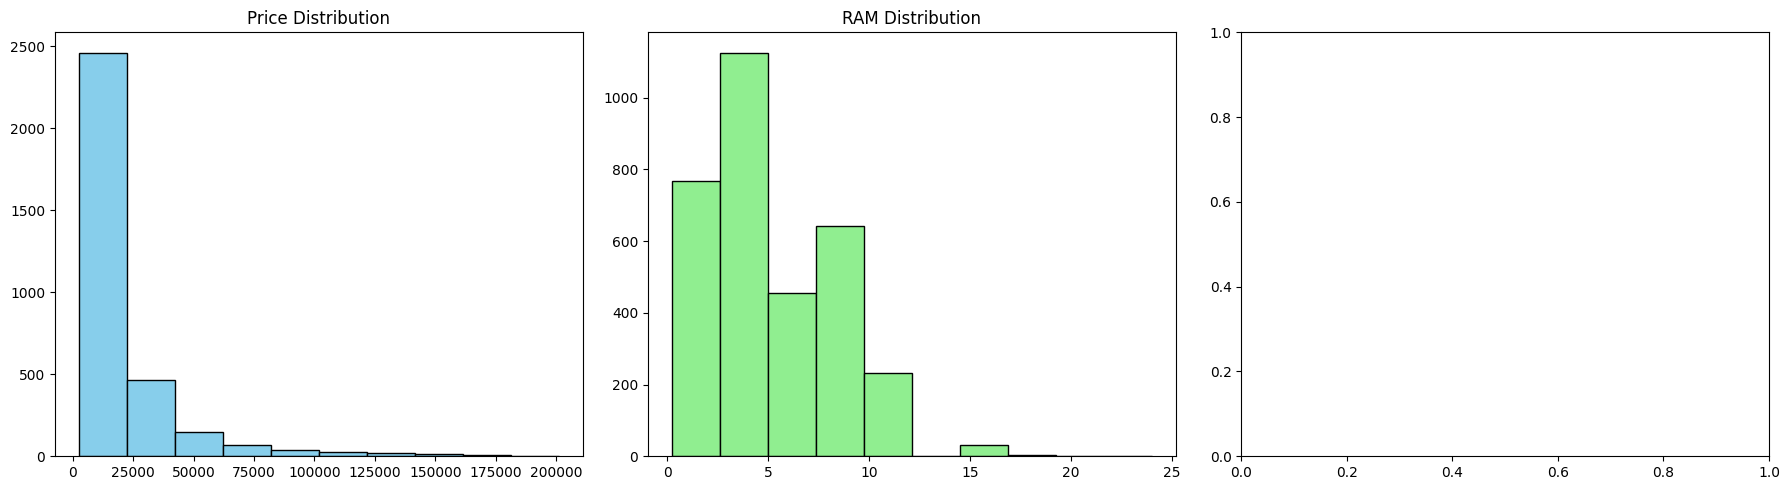

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].hist(df['Price'], color='skyblue', edgecolor='black')
axs[0].set_title('Price Distribution')

axs[1].hist(df['RAM'], color='lightgreen', edgecolor='black')
axs[1].set_title('RAM Distribution')

plt.tight_layout()
plt.show()


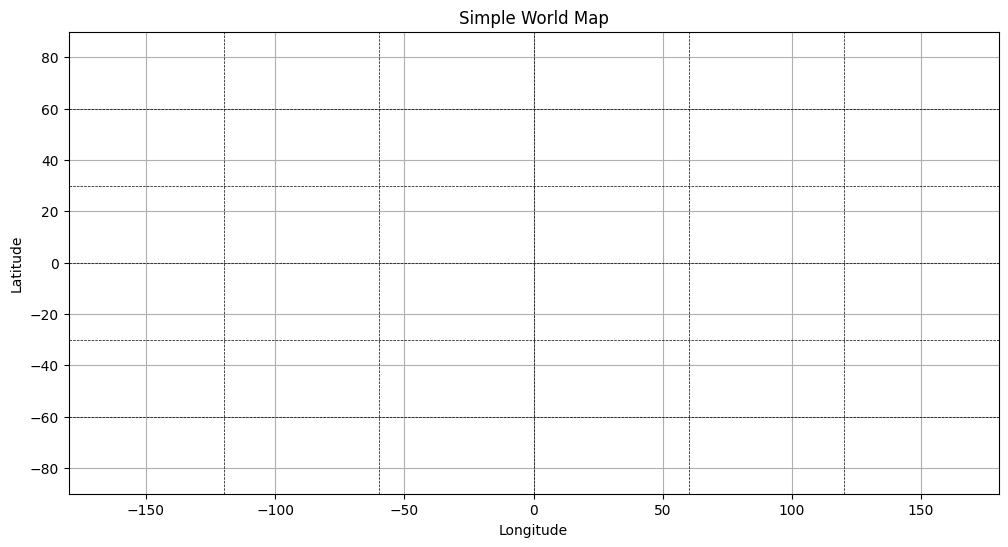

In [30]:
import matplotlib.pyplot as plt

# Plot a simple world map using just Matplotlib (no Basemap)
fig = plt.figure(figsize=(12, 6))
plt.title('Simple World Map')

# Draw longitude and latitude lines
for lat in range(-90, 91, 30):
    plt.plot([-180, 180], [lat, lat], 'k--', lw=0.5)
for lon in range(-180, 181, 60):
    plt.plot([lon, lon], [-90, 90], 'k--', lw=0.5)

plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


<ipython-input-31-0b67e0733af2>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand_name', y='Price', data=df, ci=None)


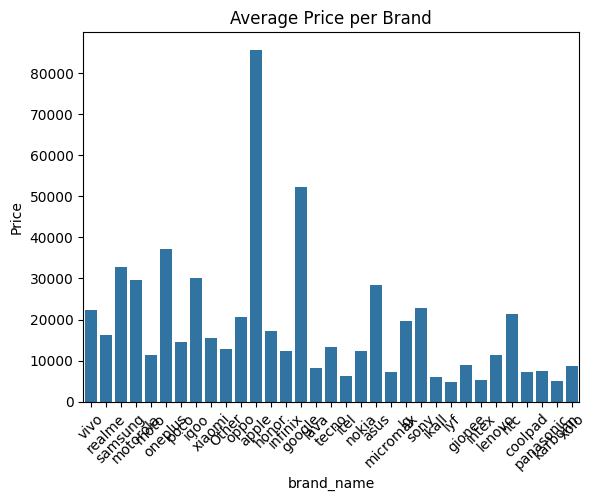

In [31]:
sns.barplot(x='brand_name', y='Price', data=df, ci=None)
plt.title('Average Price per Brand')
plt.xticks(rotation=45)
plt.show()


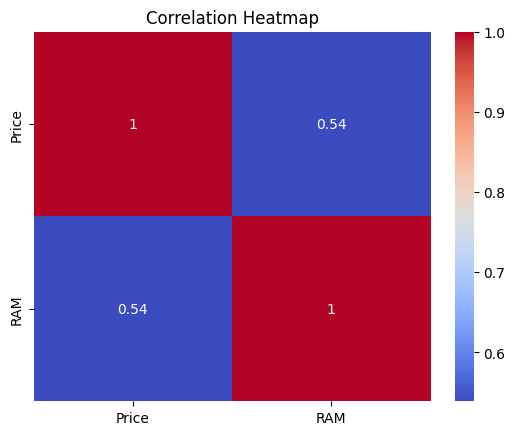

In [35]:
corr = df[['Price', 'RAM']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


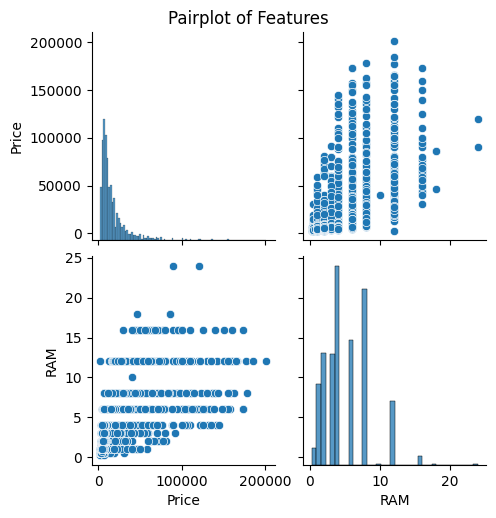

In [37]:
sns.pairplot(df[['Price', 'RAM']])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()
